## DataGrasp Coding Test - Task 2 
#### Zain Yousef

Import libraries

In [1]:
library(tree, quietly = TRUE)
library(MASS, quietly = TRUE)
library(randomForest, quietly = TRUE)
library(gbm, quietly = TRUE)
library(ISLR, quietly = TRUE)
library(rpart, quietly = TRUE)
library(rpart.plot, quietly = TRUE)

Warning message:
"package 'tree' was built under R version 3.6.3"Warning message:
"package 'MASS' was built under R version 3.6.3"Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Warning message:
"package 'gbm' was built under R version 3.6.3"Loaded gbm 2.1.5
Warning message:
"package 'ISLR' was built under R version 3.6.3"Warning message:
"package 'rpart.plot' was built under R version 3.6.2"

Import Carseats dataset

In [2]:
Carseats = Carseats
attach(Carseats)

Create a High variable, which takes on a value of Yes if the Sales variable exceeds 8, and takes on a value of No otherwise

In [3]:
High <- ifelse(Sales <= 8, "No", "Yes")

We use data.frame() function to merge High with the rest of Carseats data

In [4]:
Carseats <- data.frame(Carseats, High)

### 1) Model building
#### i) Fit a classification tree and a random forest model to predict the class of the sales (i.e. set High as the response variable and keep other variables as potential explanatory variables except Sales).

Create classification tree

In [5]:
tree = rpart(High ~ . - Sales, data = Carseats, method = "class", control = rpart.control(cp = 0.0001))
printcp(tree)


Classification tree:
rpart(formula = High ~ . - Sales, data = Carseats, method = "class", 
    control = rpart.control(cp = 1e-04))

Variables actually used in tree construction:
[1] Advertising Age         CompPrice   Income      Price       ShelveLoc  

Root node error: 164/400 = 0.41

n= 400 

         CP nsplit rel error  xerror     xstd
1 0.2865854      0   1.00000 1.00000 0.059980
2 0.1097561      1   0.71341 0.71341 0.055477
3 0.0457317      2   0.60366 0.68293 0.054756
4 0.0365854      4   0.51220 0.70732 0.055337
5 0.0274390      5   0.47561 0.60366 0.052629
6 0.0243902      7   0.42073 0.60366 0.052629
7 0.0121951      8   0.39634 0.55488 0.051124
8 0.0060976     10   0.37195 0.57317 0.051707
9 0.0001000     11   0.36585 0.55488 0.051124


Set cp equal to most effecient value that minimises xerror & update tree using this cp value

In [6]:
cp = tree$cptable[which.min(tree$cptable[,"xerror"]),"CP"]
tree_updated = prune(tree, cp = cp) # update tree with new cp

Fit random forest model

In [7]:
rF = randomForest(High ~ . - Sales, data = Carseats)
print(rF) # print result


Call:
 randomForest(formula = High ~ . - Sales, data = Carseats) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 17.75%
Confusion matrix:
     No Yes class.error
No  213  23  0.09745763
Yes  48 116  0.29268293


### 2) Plot 
#### i) Plot the classification tree and show the internal nodes in the tree, number of terminal nodes and the training error rate

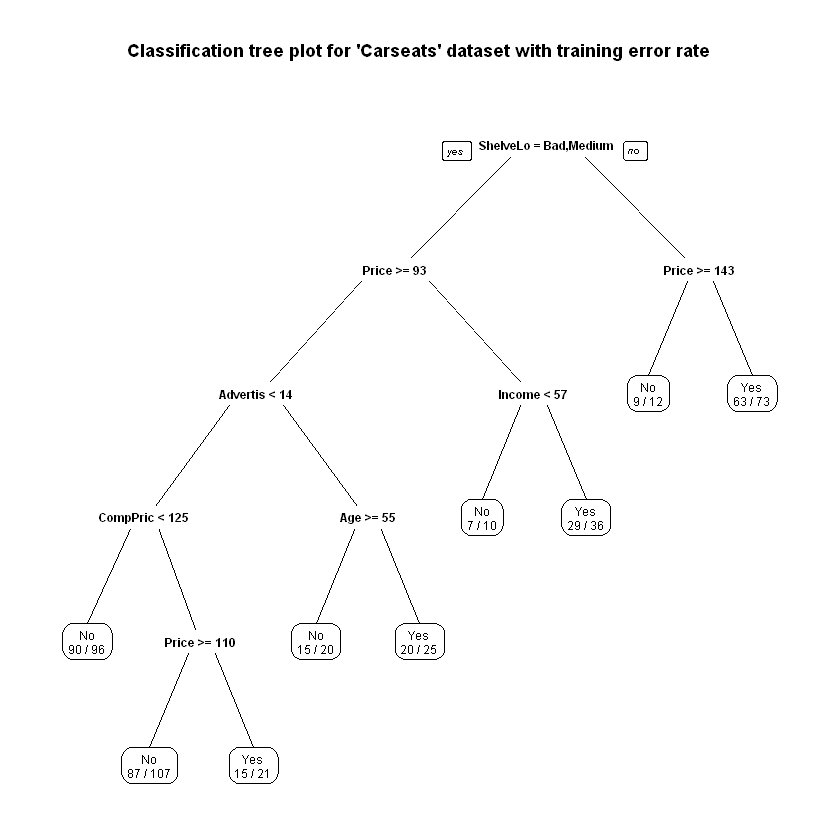

In [8]:
prp(tree_updated, faclen = 0, type = 0,cex = 0.6, extra = 2,
    main = "Classification tree plot for 'Carseats' dataset with training error rate")

### 3) Feature importance
#### i) List the importance of explanatory variables 

In [9]:
importance(rF)

,MeanDecreaseGini
CompPrice,22.434442
Income,19.939313
Advertising,23.038261
Population,15.287780
Price,43.199193
ShelveLoc,30.208784
Age,23.331162
Education,9.783878
Urban,2.145969
US,3.463754
